<a href="https://colab.research.google.com/github/jspinaj/Computer-Vision/blob/main/Pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Jupyter Notebook


In [102]:
# Setup 
#pip uninstall opencv-python
# pip install opencv-contrib-python
import imageio
import time 
import numpy as np
import random
import pandas as pd
import os

import cv2
import matplotlib
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

import extraerROI as roi

print(os.getcwd())
os.chdir(os.getcwd()+"\Segundo Avance")

import trafficSignDetection as roi2

os.chdir("..")
print(os.getcwd())

keys=['Compacidad', 'Redondez', 'Relacion entre lados', 'Primer Momento', 'Segundo Momento', 'Tercer Momento', 'Cuarto Momento', 'Quinto Momento', 'Sexto Momento', 'Septimo Momento', 'Entropia', 'Porcentaje de Area Rellena', 'Umbral usado']


#keys=['Compacidad', 'Redondez', 'Relacion entre lados', 'Primer Momento', 'Segundo Momento', 'Entropia', 'Porcentaje de Area Rellena', 'Umbral usado']


C:\Users\j2seb\Documents\Computer-Vision
C:\Users\j2seb\Documents\Computer-Vision


In [103]:
img_filename="data/traffic_signs/Flecha_Derecha/Flechader4.jpg"

#imagenROI,ima_umbralizada,var,ima_prueba= roi.extraccion_ROI(img_filename,"v")

t = time.time()

diccionario,region,imagenROI= roi2.detectROI(img_filename)
features=[]

for dic in diccionario:
    
    keys=['Compacidad', 'Redondez', 'Relacion entre lados', 'Primer Momento', 'Segundo Momento', 'Tercer Momento', 'Cuarto Momento', 'Quinto Momento', 'Sexto Momento', 'Septimo Momento', 'Entropia', 'Porcentaje de Area Rellena', 'Umbral usado']
    _,prop=roi2.dict2list(dic,keys)
    features.append(prop)


print(features)


filename = "data/my_gif.GIF"
#imageio.mimsave(filename, ima_prueba,fps=2)
#img_plot(img_og,img_processed,img_BW,filename_out)

#for k in range(len(ima_umbralizada)):
#    print(ima_umbralizada[k])

#print(ima_umbralizada)



#print(ima_umbralizada.size()) 
plt.imshow(imagenROI)


error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [104]:
# image ingest

image_list = open("data/traffic_filename_list.txt", "r")
data = []
properties = []
random.seed(10)

for img_filename in image_list:

    img_filename = img_filename.replace("\n", "")
    words = img_filename.split("/")
    img_category = words[2]
    if  True: #    
        #imagenROI, ima_umbralizada, properties, ima_prueba = roi.extraccion_ROI(
        #    img_filename, img_category)
        print(img_filename)
        diccionario,region,imagenROI= roi2.detectROI(img_filename)
        features=[]
        i=0
        for dic in diccionario:
            
            _,properties=roi2.dict2list(dic,keys)
            features.append([img_filename,img_category]+properties+[i])
            i+=1
        # plt.imshow(imagenROI)

        #filename_out="data/output/"+words[3]
        filename_out = "G:/Unidades compartidas/TIA 2021-II/Imagenes/output/" + \
            words[3]
        cv2.imwrite(filename_out,cv2.cvtColor(imagenROI,cv2.COLOR_RGB2BGR))

        #for k in range(len(ima_umbralizada)):
        #    filename_segment = "G:/Unidades compartidas/TIA 2021-II/Imagenes/output/segments/" + \
        #        img_category+"_"+str(k)+"_"+words[3]
        #    cv2.imwrite(filename_segment, cv2.cvtColor(
        #        ima_umbralizada[k], cv2.COLOR_RGB2BGR))
        #    print(filename_segment)

        data+=features


# images properties dataframe
col_features = keys
col_names = ['img_filename', 'category']+keys  +["iindex"]      

df = pd.DataFrame(data, columns=col_names)

#clean data
df.replace("", "Nan", inplace=True)
df.dropna( inplace=True)

csv_filename = "data/properties.csv"
df.to_csv(csv_filename)             # guardar datos a archivo csv


# print(df2)


data/traffic_signs/Ceda_el_Paso/Cedapaso1.jpg


error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [160]:
# Properties Analysis
col_features = keys

csv_filename="data/properties - copia.csv"
df=pd.read_csv(csv_filename)      # leer archivo csv para probar
category=pd.read_csv("data/category.csv")
#print(category)  
#print(df)

df['category']=category['category']
print(df.groupby(['category']).size())

#df = df[df['category'] != "ruido"]      # eliminar ruidos

char=["Ceda_el_Paso","Pare","Prohibido_Parquear","Prohibido_giro_izquierda","Velocidad30","Velocidad40","Velocidad50","ruido"]

isSelected=df["category"]==char[0]

for c in char:
    isSelected=isSelected | (df["category"]==c)

df = df[isSelected]

features=df[col_features]          # separando las propiedades del dataframe
corr_coef = features.corr()                     # coeficiente estadistico

mu=features.mean()                              # media de cada propiedad
sigma=features.var()                            # vector de varianzas  

#print(corr_coef)

# Normalization 
features=(features-mu)/sigma

# Perform PCA analysis
# dos formas de hacer PCA
#LAD
pca = PCA(n_components=5)       # 1. definiendo cantidad de componentes
#pca=PCA(0.8)                                    # 2. por grado semejanza
pca.fit(features)                               # aplicación 
print(pca.components_)
print("explained_varianc_ratio " + str(pca.explained_variance_ratio_))

reduced_features=pca.transform(features)     

df['pca1']=reduced_features[:,0]

df['pca2']=reduced_features[:,1]
#print(reduced_features[:,1])
#print(reduced_features)

category
Ceda_el_Paso                 56
No_pase                       5
Pare                         21
Prohibido_Parquear           25
Prohibido_U                   5
Prohibido_giro_derecha        6
Prohibido_giro_izquierda     21
Rotonda                       1
Velocidad30                  31
Velocidad40                  21
Velocidad50                  11
Velocidad60                   6
ruido                       253
dtype: int64
[[ 2.18376796e-05 -1.77134323e-01  9.45187402e-01 -2.60149459e-01
  -6.59783234e-02 -3.35734881e-02 -4.56127849e-02  8.21348038e-04
   3.89779583e-04  5.18541806e-04 -1.85269860e-03  1.02382249e-03
   2.10743561e-04]
 [ 5.74889134e-06  2.22668659e-02 -2.69439374e-01 -9.55265447e-01
  -7.63070927e-02 -4.55527136e-02 -7.68044561e-02  1.43903710e-04
   1.10181984e-03  3.17203455e-04 -2.29570089e-02 -6.85824153e-03
  -1.54763660e-03]
 [ 1.19515642e-04 -9.78166842e-01 -1.76378987e-01  3.09021915e-02
  -1.32142274e-03 -4.75912518e-02  8.23610059e-03 -1.00279393e

8


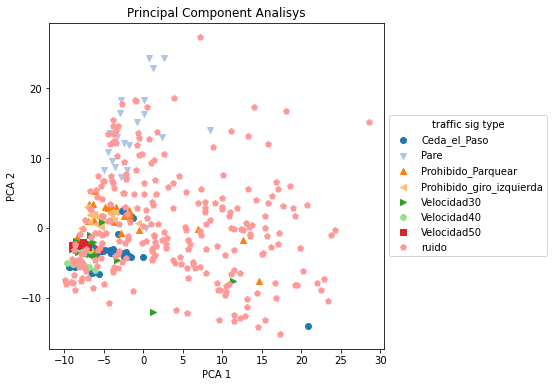

In [161]:
# Plot
categories = []

fig, ax = plt.subplots(figsize=(6, 6))
# "tab10" "tab20" "Pastel2" "Dark2" "Set3"
style = "tab20"
cmap = matplotlib.cm.get_cmap(style)
marker = ['o', 'v', '^', '<', '>', '8', 's',
          'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
t = 0
for ct, dfC in df.groupby('category'):
    scatter = plt.scatter(dfC.pca1, dfC.pca2, color=cmap(t), marker=marker[t])
    categories.append(ct)
    t = t+1

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Principal Component Analisys')
print(len(categories))
ax.legend(categories, loc='center left', bbox_to_anchor=(
    1, 0.5), title='traffic sig type')


# plt.show()


In [162]:
idx= np.random.randint(0,10,features.shape[0])

trainData=features[idx>1].astype(np.float32)
newcomer=features[idx<=1].astype(np.float32)
responses=pd.Categorical(df.category).codes
responses=responses[idx==0].astype(np.float32)

print(idx)
print(responses)
print("entrenamiento: ",np.sum(idx>1))
print("validación: ",np.sum(idx<=1))
print("porcentaje entrenamiento: ",np.sum(idx>1)/(np.sum(idx>1)+np.sum(idx<=1)))

[1 8 3 2 5 0 5 3 5 7 6 2 3 9 7 1 7 2 4 4 3 5 8 6 7 5 2 7 1 4 7 7 9 9 0 5 8
 6 9 0 6 0 3 9 3 3 8 9 0 9 1 7 4 0 6 8 4 5 5 5 3 0 1 3 6 5 4 0 4 9 8 2 5 5
 0 6 2 9 8 2 0 8 1 5 4 9 2 2 5 2 8 5 4 4 8 2 4 9 4 4 3 7 7 5 4 1 2 9 9 0 7
 5 5 7 6 8 4 1 5 8 4 6 1 0 0 4 1 5 5 7 4 8 8 5 2 1 0 5 8 8 4 9 2 1 8 2 6 7
 3 8 3 9 8 2 0 3 0 7 8 5 7 0 8 0 8 8 3 6 0 3 6 2 1 1 7 9 9 4 5 6 5 2 6 4 2
 9 0 4 8 7 1 9 3 4 6 8 9 0 0 1 7 2 8 7 8 6 3 0 4 3 6 6 7 2 5 6 1 1 8 1 9 5
 7 0 0 2 4 7 3 6 5 2 7 1 3 2 1 6 5 4 4 1 0 7 6 0 3 8 3 6 3 2 7 5 0 4 0 2 8
 1 5 8 9 1 9 5 2 1 1 1 3 0 4 7 1 9 6 1 8 4 5 3 0 9 1 0 1 1 1 9 3 5 1 1 0 6
 2 1 8 9 4 3 0 8 0 4 8 6 3 1 4 2 9 9 0 2 4 2 3 7 8 0 3 2 1 2 4 6 9 7 0 6 4
 0 8 4 4 0 5 0 5 0 1 3 5 4 6 4 1 2 8 1 8 6 6 9 3 0 8 5 2 8 4 6 1 9 5 5 3 4
 8 1 2 3 6 1 1 2 2 8 8 9 7 1 7 5 3 7 6 1 8 8 4 2 6 9 2 2 1 5 0 2 2 3 8 2 6
 5 0 3 5 0 4 3 7 3 6 6 7 4 0 5 1 0 0 1 2 2 8 9 6 2 2 7 0 8 8 0 9]
[7. 7. 7. 0. 7. 7. 7. 0. 7. 0. 0. 7. 7. 0. 7. 7. 7. 7. 7. 7. 1. 1. 1. 7.
 7. 7. 7. 7. 3. 3. 3. 3. 2. 7. 2. 2.

In [163]:
idx= np.random.randint(0,2,features.shape[0])


all_responses=pd.Categorical(df.category).codes
#all_responses = np.random.randint(0,10,(features.shape[0],1)).astype(np.float32)

all_data=features.to_numpy().astype(np.float32)

#PCA
all_data=reduced_features.astype(np.float32)


trainData=all_data[idx==0]
#responses=all_responses[idx==0]

lista=all_responses[idx==0]

responses=[]
for element in lista:
    responses.append([element])
responses=np.array(responses).astype(np.int32)

newcomer=all_data[idx!=0]

lista=all_responses[idx!=0]
check_responses=[]
for element in lista: 
    check_responses.append([element])
check_responses=np.array(check_responses).astype(np.float32)

#print(type(trainData))
#print(type(responses))

#print(trainData.shape)
#print(responses.shape)

knn = cv2.ml.KNearest_create()

knn.train(trainData,cv2.ml.ROW_SAMPLE,responses)

ret, results, neighbours, dist = knn.findNearest(newcomer, 3)


#print ("results: ", results,"\n")
#print ("neighbours: ", neighbours,"\n")
#print ("distances: ", dist)
accuracy=0

for i in range(len(results)):
    if results[i]==check_responses[i]:
        accuracy+=1

print(accuracy)
print("accuracy:",accuracy," / ",len(results),"  ",100*accuracy/len(results)," %")



#print( np. concatenate((results, check_responses), axis=1))
#print(results[1])
#print(check_responses[1])

149
accuracy: 149  /  191    78.01047120418848  %


In [164]:
from sklearn import metrics
model=knn
esperado=check_responses
prediccion=results
print("Reporte del Clasificador: \n %s\n %s\n"
      %(model, metrics.classification_report(esperado,prediccion)))

Reporte del Clasificador: 
 <ml_KNearest 00000216EB11DA10>
               precision    recall  f1-score   support

         0.0       0.79      0.96      0.86        23
         1.0       0.57      0.44      0.50         9
         2.0       0.50      0.45      0.48        11
         3.0       0.55      0.75      0.63         8
         4.0       0.64      0.69      0.67        13
         5.0       0.44      0.57      0.50         7
         6.0       0.20      0.17      0.18         6
         7.0       0.92      0.86      0.89       114

    accuracy                           0.78       191
   macro avg       0.58      0.61      0.59       191
weighted avg       0.79      0.78      0.78       191




In [165]:
lista=pd.Categorical(df.category).codes
all_responses=[]
for element in lista:
    all_responses.append([element])

aleatorio = np.random.randint(0,10,(features.shape[0],1)).astype(np.float32)
print(all_responses)

#print(aleatorio)
#print(responses)


[[7], [7], [7], [0], [7], [7], [0], [7], [0], [7], [0], [7], [0], [0], [7], [7], [7], [0], [7], [0], [7], [0], [7], [0], [0], [0], [7], [7], [0], [7], [7], [7], [0], [7], [7], [0], [7], [7], [0], [7], [7], [0], [7], [0], [7], [0], [7], [0], [7], [7], [0], [7], [0], [7], [7], [0], [7], [7], [7], [0], [7], [7], [7], [7], [0], [7], [7], [0], [7], [7], [7], [0], [0], [7], [7], [7], [0], [7], [7], [0], [0], [7], [7], [7], [0], [7], [0], [7], [0], [7], [7], [0], [0], [0], [0], [0], [0], [0], [0], [0], [7], [7], [0], [7], [0], [0], [0], [7], [7], [0], [7], [7], [7], [0], [7], [0], [7], [7], [7], [0], [7], [7], [0], [7], [7], [7], [0], [7], [7], [0], [7], [7], [7], [0], [7], [7], [0], [7], [7], [7], [7], [7], [1], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [1], [1], [1],

In [166]:
print(features.shape[0])

439


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


True

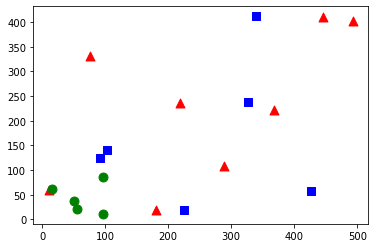

In [167]:

trainData = np.random.randint(0,500,(51,10)).astype(np.float32)
responses = np.random.randint(0,10,(51,1)).astype(np.float32)

red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')


newcomer = np.random.randint(0,100,(5,10)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')


print(type(trainData))
print(type(responses))

knn = cv2.ml.KNearest_create()
knn.train(trainData,cv2.ml.ROW_SAMPLE,responses)


In [168]:

img_filename="data/Prohibidoparq_ideal.png"

img_ideal=cv2.imread(img_filename) 
img_og=cv2.imread("data/traffic_signs/Prohibido_Parquear/Prohibidoparq13.jpg")

vector_size=15
#alg= cv2.SIFT_create()
alg = cv2.AKAZE_create()

kp1, des1 = alg.detectAndCompute(img_ideal,None)
kp2, des2 = alg.detectAndCompute(img_og,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

print(type(des1))

print(type(des2))

# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
print(matches[1])


list_x = []
list_y = []

# For each match...
for mat in matches:

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1, y1) = kp1[img1_idx].pt
    (x2, y2) = kp2[img2_idx].pt

    # Append to each list
    list_x.append(x2)
    list_y.append(y2)



img3 = cv2.drawMatches(img_ideal,kp1,img_og,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#cv2.drawContours(img_og,list_kp2, -1, (0, 255, 0), 3)
start_point = (int(min(list_x)),int(min(list_y)))
end_point = (int(max(list_x)),int(max(list_y)))
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 10
print(start_point)
cv2.rectangle(img_og,start_point, end_point,color,thickness  )
for i in range(len(list_x)):
    cv2.circle(img_og,(int(list_x[i]),int(list_y[i])),60,color,-1)
cv2.imwrite('data/out.jpg',img_og)
plt.imshow(img_og),plt.show()


error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\features2d\src\akaze.cpp:172: error: (-215:Assertion failed) ! image.empty() in function 'cv::AKAZE_Impl::detectAndCompute'


In [169]:


print(categories)

df_cla = [x for _, x in df.groupby('category')]
print(df)


['Ceda_el_Paso', 'Pare', 'Prohibido_Parquear', 'Prohibido_giro_izquierda', 'Velocidad30', 'Velocidad40', 'Velocidad50', 'ruido']
     Unnamed: 0                                    img_filename      category  \
0             0   data/traffic_signs/Ceda_el_Paso/Cedapaso1.jpg         ruido   
1             1  data/traffic_signs/Ceda_el_Paso/Cedapaso10.jpg         ruido   
2             2  data/traffic_signs/Ceda_el_Paso/Cedapaso10.jpg         ruido   
3             3  data/traffic_signs/Ceda_el_Paso/Cedapaso10.jpg  Ceda_el_Paso   
4             4  data/traffic_signs/Ceda_el_Paso/Cedapaso10.jpg         ruido   
..          ...                                             ...           ...   
451         451      data/traffic_signs/Velocidad50/Vel50_4.jpg   Velocidad50   
452         452      data/traffic_signs/Velocidad50/Vel50_5.jpg   Velocidad50   
453         453      data/traffic_signs/Velocidad50/Vel50_7.jpg   Velocidad50   
454         454      data/traffic_signs/Velocidad50/Vel50_9.j